In [ ]:
import os
import requests
import json
import nltk
from snakebite.client import Client

In [ ]:
##get data connection
client1 = Client('localhost',19000)
endpoint = "https://api.twitter.com/1.1/tweets/search/fullarchive/HistoricalTweets.json"
headers = {"Authorization":"Bearer xxx", "Content-Type": "application/json"}

In [ ]:
##query and write (Tweets prior to Cambridge Analytica [mid-March 2018])
data = '{"query":"#AI OR #ArtificialIntelligence OR #MachineLearning lang:en", "fromDate": "201703190000", "toDate": "201803190000" , "maxResults":100}'
response = requests.post(endpoint,data=data,headers=headers).json()
file = json.dumps(response, indent = 2)
with open('data.txt', 'w') as outfile:
    json.dump(file, outfile)

In [ ]:
##query and write (Tweets after  Cambridge Analytica [mid-March 2018-9])
data = '{"query":"#AI OR #ArtificialIntelligence OR #MachineLearning lang:en", "fromDate": "201803200000", "toDate": "201903190000" , "maxResults":100}'
response = requests.post(endpoint,data=data,headers=headers).json()
file = json.dumps(response, indent = 2)
with open('data2.txt', 'w') as outfile:
    json.dump(file, outfile)

In [ ]:
#textblob install, read and test
pip install -U textblob

In [1]:
from textblob import TextBlob

In [4]:
testimonial = TextBlob("negative hate angry")

In [5]:
#okay.all set to process data "PrePostAITweet" a merge of query output
testimonial.sentiment

Sentiment(polarity=-0.5333333333333333, subjectivity=0.7666666666666666)

In [6]:
#prospective analysis/recode packages
import re
import string
import numpy as np
import random
import pandas as pd

In [7]:
data=pd.read_csv ("PrePostAITweets.csv")

In [ ]:
data.head

In [ ]:
##deferred to single-line command (two down) ##not used
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [9]:
#polarity and subjectivity
data [['polarity', 'subjectivity']] = data['Tweet'].apply(lambda Tweet: pd.Series(TextBlob(Tweet).sentiment))

In [ ]:
print("data-frame shape: ", data.shape)
print ("column names: ", data.columns.values)
duplicate_rows_df = data[data.duplicated()]
print ("number of duplicate rows: ", duplicate_rows_df.shape)

In [10]:
#binning based on "Time" in relation the whether tweet stamp was pre- or post- the critical AI event (March 2018)# 

tw_labels = ['pre', 'post']
category = [-0.9,0.9,1.01]
data['prepost_labels'] = pd.cut(data['Time'], labels=tw_labels, bins=category, include_lowest=False)

In [12]:
#lots of 0 values. pull out invariant values
data[data['polarity'] > 0.1].head()

,Tweet,Time,polarity,subjectivity,prepost_labels
1,google + udacity introduced a free course des...,1,0.40,0.800000,post
3,phenomenal fintech in insights by kpmg,1,0.50,0.500000,post
9,a randomized trial of deep learning ai shows t...,1,0.30,0.511111,post
13,ammut plans to increase its token value by buy...,1,0.25,0.250000,post
14,announcing our most popular blockchain speakers,1,0.55,0.700000,post


In [13]:
criteria= data['polarity'] >0

In [14]:
#write datacrit, limited to non-zero polarity scores
data[criteria].to_csv (r'datacrit.csv', index = None, header=True)

In [25]:
#some manual edits in excel (removing proper names, gibberish, and posts with minor content variation)
df=pd.read_csv ("datacrit1.csv")

In [26]:
df.head ()

,Tweet,Time,polarity,subjectivity,prepost_labels
0,released at gtc tensor now offers suppo on a...,1,0.118182,0.227273,post
1,computer kidney could provide safer tests for ...,1,0.136364,0.454545,post
2,embracing the new technological frontier stas ...,1,0.136364,0.454545,post
3,even with all the new technology like machinel...,1,0.136364,0.454545,post
4,bill gates wants stanford university to teach ...,1,0.200000,0.100000,post


In [27]:
##means by binning-categorical #difference of means testing done in SPSS totesting diff distribution assumptions. Both sig 
#equal variance t = 2.20 exact p = .031 (marginally sig); unequal var = 2.52 exact p= .016 (a little less marginal))
df.groupby('Time').mean () 

,polarity,subjectivity
Time,,
0,0.433933,0.529499
1,0.312626,0.426501


In [33]:
#matplotlib column and line charts by binned (events)-dependencies
import matplotlib
import matplotlib.pyplot as plt
import seaborn; seaborn.set() 

In [28]:
#using a dict.-like input "data2" for plots
data2 =pd.DataFrame({"TIME" : ["PRE","POST"], 
                      'AveragePolarity' : [.434,.313]})

In [31]:
data4 =pd.DataFrame({"TIME" : ["PRE","POST"], 
                      'AverageSubjectivity' : [.529,.426]})

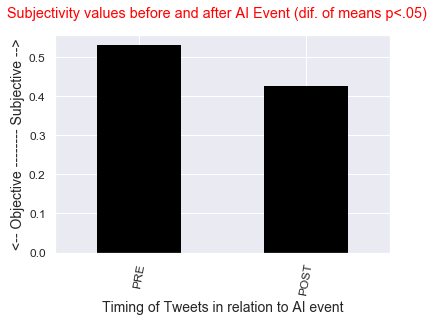

In [37]:
data4.plot(kind='bar', legend=False, x='TIME',y='AverageSubjectivity', color='black', linewidth=0)
plt.xlabel('Timing of Tweets in relation to AI event', fontsize=14)
plt.ylabel('<-- Objective -------- Subjective -->', fontsize=14)
plt.setp(plt.gca().get_yticklabels(), fontsize=12)
plt.setp(plt.gca().get_xticklabels(), rotation=80, fontsize=12)
plt.suptitle('Subjectivity values before and after AI Event (dif. of means p<.05)', color='red')
plt.show()

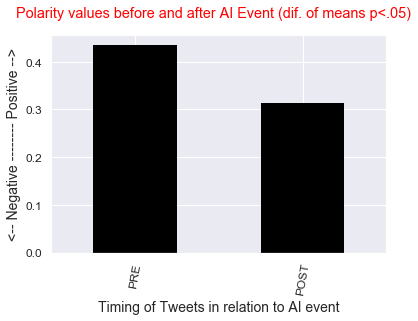

In [36]:
data2.plot(kind='bar', legend=False, x='TIME',y='AveragePolarity', color='black', linewidth=0)
plt.xlabel('Timing of Tweets in relation to AI event', fontsize=14)
plt.ylabel('<-- Negative -------- Positive -->', fontsize=14)
plt.setp(plt.gca().get_yticklabels(), fontsize=12)
plt.setp(plt.gca().get_xticklabels(), rotation=80, fontsize=12)
plt.suptitle('Polarity values before and after AI Event (dif. of means p<.05)', color='red')
plt.show()